### Tarefa Grafos I 

<p>Imports</p>

In [5]:
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt

<p>Formatear el dataset</p>

In [21]:

"""rutas = pd.read_csv("routes.csv")


rutas = rutas[['Source airport','Destination airport']]
rutas = rutas.head(100)
"""


rutas = pd.read_csv('routes.csv')




aerpuertos = pd.read_csv('airports.csv',
    na_values='\\N')

aerpuertos_es = aerpuertos[aerpuertos['Country'] ==
                       'Spain']

aerpuertos_es

"""rutas_es = rutas[
    rutas['Source airport'].isin(aerpuertos_es.index) &
    rutas['Destination airport'].isin(aerpuertos_es.index)]

rutas_es"""


"rutas_es = rutas[\n    rutas['Source airport'].isin(aerpuertos_es.index) &\n    rutas['Destination airport'].isin(aerpuertos_es.index)]\n\nrutas_es"

['Source airport', 'Destination airport', 'AER', 'ASF', 'CEK', 'DME', 'EGO', 'GYD', 'KGD', 'KZN', 'LED', 'MRV', 'NBC', 'NJC', 'NUX', 'OVB', 'SVX', 'TGK', 'UUA', 'BTK', 'HTA', 'IKT', 'KCK', 'MJZ', 'ODO', 'UKX', 'ULK', 'YKS', 'AYP', 'CUZ', 'HUU', 'IQT', 'LIM', 'PCL', 'PEM', 'TPP', 'ABJ', 'ACC', 'BKO', 'BOY', 'COO', 'DKR', 'LFW', 'NIM', 'OUA']
[('Source airport', 'AER'), ('Source airport', 'ASF'), ('Source airport', 'CEK'), ('Source airport', 'DME'), ('Source airport', 'EGO'), ('Source airport', 'GYD'), ('Source airport', 'KGD'), ('Source airport', 'KZN'), ('Source airport', 'LED'), ('Source airport', 'MRV'), ('Source airport', 'NBC'), ('Source airport', 'NJC'), ('Source airport', 'NUX'), ('Source airport', 'OVB'), ('Source airport', 'SVX'), ('Source airport', 'TGK'), ('Source airport', 'UUA'), ('Source airport', 'BTK'), ('Source airport', 'HTA'), ('Source airport', 'IKT'), ('Source airport', 'KCK'), ('Source airport', 'MJZ'), ('Source airport', 'ODO'), ('Source airport', 'UKX'), ('Source

ValueError: could not convert string to float: 'E'

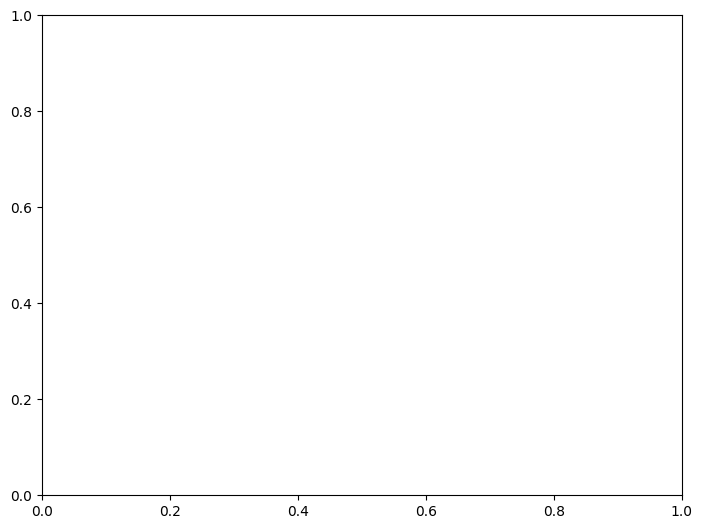

In [10]:


grafo=nx.DiGraph() 
grafo.add_nodes_from(routes.keys())

for x,y in routes.items():
    grafo.add_edge(y)


#lista de nodos o vértices
print (grafo.nodes)
#lista de aristas
print(grafo.edges)
#num de nodos y aristas
print("nodos:",grafo.number_of_nodes())
print("aristas: ",grafo.number_of_edges())

